In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from hardwares.hardware_params import hardware_params
from model_analyzer import ModelAnalyzer
%load_ext autoreload
%autoreload 2

/home/shen/miniconda3/envs/3dsim/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# model_id="meta-llama/Llama-2-13b-hf"
# hardware="nvidia_A6000"
model_id="Qwen/Qwen2.5-7B"
hardware="Samsung_Exynos_2400"
analyzer=ModelAnalyzer(model_id,hardware)

use config file configs/Qwen.py for Qwen/Qwen2.5-7B


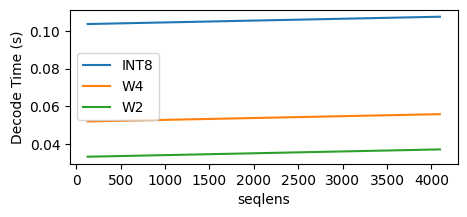

In [7]:
fig=plt.figure(figsize=(5, 2))
# for wbit in [16,8,4,2,1]:
for wbit in [8,4,2]:
    # batchsizes=range(1,64)
    seqlens=[128,256,512,1024,2048,4096]
    ys=[]
    # for batchsize in batchsizes:
    #     result=analyzer.analyze(1024,batchsize,wbit,16,16)
    #     ys.append(result["total_results"]["decode"]["inference_time"])
    for seqlen in seqlens:
        result=analyzer.analyze(seqlen,1,wbit,8,8)
        ys.append(result["total_results"]["decode"]["inference_time"])
    # plt.plot(batchsizes,ys,label=f"W{wbit}" if wbit!=16 else "FP16")
    plt.plot(seqlens,ys,label=f"W{wbit}" if wbit!=8 else "INT8")
plt.legend()
plt.ylabel("Decode Time (s)")
# plt.xlabel("Batch Size")
plt.xlabel("seqlens")
# plt.savefig("../output/quantization_memory_access_batch.pdf",bbox_inches='tight')
plt.savefig("../output/quantization_memory_access_seqlens.pdf",bbox_inches='tight')

[4.003404036872621]
[4.003404036872621, 8.030896073626547]
[4.003404036872621, 8.030896073626547, 16.18208937477247]
[4.003404036872621, 8.030896073626547, 16.18208937477247, 32.86931288761658]
[4.003404036872621, 8.030896073626547, 16.18208937477247, 32.86931288761658, 67.78310755551388]
[4.003404036872621, 8.030896073626547, 16.18208937477247, 32.86931288761658, 67.78310755551388, 143.7680874601448]
[3.999414304983895]
[3.999414304983895, 8.02690634173782]
[3.999414304983895, 8.02690634173782, 16.178099642883744]
[3.999414304983895, 8.02690634173782, 16.178099642883744, 32.86532315572786]
[3.999414304983895, 8.02690634173782, 16.178099642883744, 32.86532315572786, 67.77911782362516]
[3.999414304983895, 8.02690634173782, 16.178099642883744, 32.86532315572786, 67.77911782362516, 143.76409772825608]
[3.9974194390395317]
[3.9974194390395317, 8.024911475793457]
[3.9974194390395317, 8.024911475793457, 16.176104776939383]
[3.9974194390395317, 8.024911475793457, 16.176104776939383, 32.863328

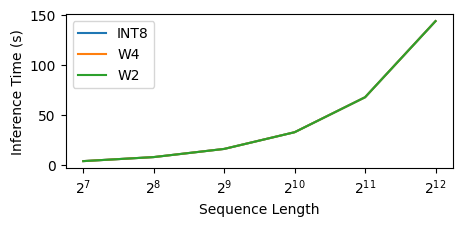

In [ ]:
fig=plt.figure(figsize=(5, 2))
# for wbit in [16,8,4,2,1]:
for wbit in [8,4,2]:
    # seqlens=range(4, 11)
    # seqlens=range(16,1024)
    seqlens=[128,256,512,1024,2048,4096]
    ys=[]
    for seqlen in seqlens:
        # seqlen=2**seqlen
        # result=analyzer.analyze(seqlen,1,wbit,16,16)
        result=analyzer.analyze(seqlen,1,wbit,8,8)
        ys.append(result["total_results"]["prefill"]["inference_time"])
        print(ys)
    # plt.plot(seqlens,ys,label=f"W{wbit}" if wbit!=16 else "FP16")
    plt.plot(seqlens,ys,label=f"W{wbit}" if wbit!=8 else "INT8")
plt.legend()
plt.xscale('log',base=2)
plt.ylabel("Prefill Time (s)")
plt.xlabel("Sequence Length")
plt.savefig("../output/quantization_memory_access_seq_len.pdf",bbox_inches='tight')